In [1]:
# Importando o Pandas 2.2.2
import pandas as pd
pd.__version__

'2.2.2'

In [2]:
# Importando o dataset de avaliações de vendas da Amazon Índia
amazon = pd.read_csv('../dados/amazon.csv')

In [3]:
# Nome das colunas
amazon.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [4]:
# Quantidade de valores sem tratamento
amazon.index

RangeIndex(start=0, stop=1465, step=1)

In [5]:
# Selecionando apenas as colunas relevantes do dataset
amazon = amazon[['category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]
amazon.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269"
1,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994"
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928"
3,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363"
4,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905"


In [6]:
# Removendo os caracteres especiais das strings
amazon['discounted_price'] = amazon['discounted_price'].str.replace('₹', '')
amazon['discounted_price'] = amazon['discounted_price'].str.replace(',', '')

amazon['actual_price'] = amazon['actual_price'].str.replace('₹', '')
amazon['actual_price'] = amazon['actual_price'].str.replace(',', '')

amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%', '')
                                                                          
amazon['rating_count'] = amazon['rating_count'].str.replace(',', '')

In [7]:
# Removendo um valor incoerente na coluna de 'rating'
amazon.drop(amazon[amazon['rating'] == '|'].index, inplace = True)

In [8]:
# Removendo nulls
amazon = amazon.dropna()

In [9]:
# Transformando as colunas de strings para números (float e int)
amazon['discounted_price'] = amazon['discounted_price'].astype(float)
amazon['actual_price'] = amazon['actual_price'].astype(float)
amazon['discount_percentage'] = amazon['discount_percentage'].astype(float)
amazon['rating'] = amazon['rating'].astype(float)
amazon['rating_count'] = amazon['rating_count'].astype(int)

In [10]:
# Primeira visualização pós transformações
amazon.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269
1,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994
2,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928
3,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363
4,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905


In [11]:
# Criando uma matriz de correlação linear, para avaliar se algum fator pode ser altamente descritivo de outro
amazon[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr()

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961910,-0.242298,0.121132,-0.027304
actual_price,0.961910,1.000000,-0.117855,0.122467,-0.036215
discount_percentage,-0.242298,-0.117855,1.000000,-0.155679,0.011294
rating,0.121132,0.122467,-0.155679,1.000000,0.102235
rating_count,-0.027304,-0.036215,0.011294,0.102235,1.000000


In [12]:
# Descobrindo quantos registros existem por categorias de produtos
categories_value_counts = dict(amazon['category'].value_counts())
categories_value_counts

{'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables': 231,
 'Electronics|WearableTechnology|SmartWatches': 76,
 'Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones': 68,
 'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions': 63,
 'Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear': 52,
 'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls': 49,
 'Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders': 27,
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables': 24,
 'Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons': 24,
 'Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice': 24,
 'Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters': 23,
 'Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|LintShavers': 22,
 'Home&Kitchen|Heating,Cooli

In [13]:
# Criando diferentes dataframes, segmentados por categorias
# 4 dataframes contendo 1455 registros. Representam 99,31% de todos os registros do .csv original
computers_accessories = amazon[amazon['category'].str.startswith('Computers')] # 451 registros
computers_accessories.reset_index(inplace = True)
                                 
electronics = amazon[amazon['category'].str.startswith('Electronics')] # 526 registros
electronics.reset_index(inplace = True)

home = amazon[amazon['category'].str.startswith('Home')] # 449 registros
home.reset_index(inplace = True)

office = amazon[amazon['category'].str.startswith('Office')] # 29 registros
office.reset_index(inplace = True)

In [14]:
# Medidas de tendência de centralidade e variância do segmento de Computadores
computers_accessories_agg = computers_accessories[['discounted_price', 'actual_price', 'rating', 'rating_count']].agg(['mean', 'median', 'min', 'max', 'std'])
computers_accessories_agg

,discounted_price,actual_price,rating,rating_count
mean,845.393836,1686.659157,4.155654,17136.782705
median,349.000000,999.000000,4.200000,7732.000000
min,39.000000,39.000000,3.300000,5.000000
max,37247.000000,59890.000000,5.000000,253105.000000
std,2388.047248,3885.719590,0.252776,30133.915819


In [15]:
# Medidas de tendência de centralidade e variância do segmento de Eletrônicos
eletronics_agg = electronics[['discounted_price', 'actual_price', 'rating', 'rating_count']].agg(['mean', 'median', 'min', 'max', 'std'])
eletronics_agg

,discounted_price,actual_price,rating,rating_count
mean,5965.887833,10127.311787,4.081749,29997.809886
median,1399.000000,3199.500000,4.100000,10689.000000
min,79.000000,171.000000,2.800000,7.000000
max,77990.000000,139900.000000,4.700000,426973.000000
std,10279.670967,15495.772671,0.269620,61729.576162


In [16]:
# Medidas de tendência de centralidade e variância para o segmento Doméstico
home_agg = home[['discounted_price', 'actual_price', 'rating', 'rating_count']].agg(['mean', 'median', 'min', 'max', 'std'])
home_agg

,discounted_price,actual_price,rating,rating_count
mean,2322.251247,4150.797327,4.041648,6678.492205
median,1199.000000,1999.000000,4.100000,2326.000000
min,79.000000,79.000000,2.000000,2.000000
max,42990.000000,75990.000000,4.800000,270563.000000
std,3466.069910,6797.371662,0.334648,16418.584549


In [17]:
# Medidas de tendência de centralidade e variância para o segmento Escritório
office_agg = office[['discounted_price', 'actual_price', 'rating', 'rating_count']].agg(['mean', 'median', 'min', 'max', 'std'])
office_agg

,discounted_price,actual_price,rating,rating_count
mean,301.580645,397.193548,4.309677,4828.225806
median,178.000000,210.000000,4.300000,4426.000000
min,50.000000,50.000000,4.000000,388.000000
max,1399.000000,2999.000000,4.500000,12179.000000
std,317.288699,552.781839,0.149119,2853.095766


In [18]:
# Fazendo a matriz de correlação linear segmentada por categoria de Computadores e Acessórios
computers_accessories[['discounted_price', 'actual_price', 'rating', 'rating_count']].corr()

,discounted_price,actual_price,rating,rating_count
discounted_price,1.000000,0.966529,0.079644,-0.005534
actual_price,0.966529,1.000000,0.084355,-0.007987
rating,0.079644,0.084355,1.000000,0.159041
rating_count,-0.005534,-0.007987,0.159041,1.000000


array([[<Axes: title={'center': 'discounted_price'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'rating_count'}>, <Axes: >]], dtype=object)

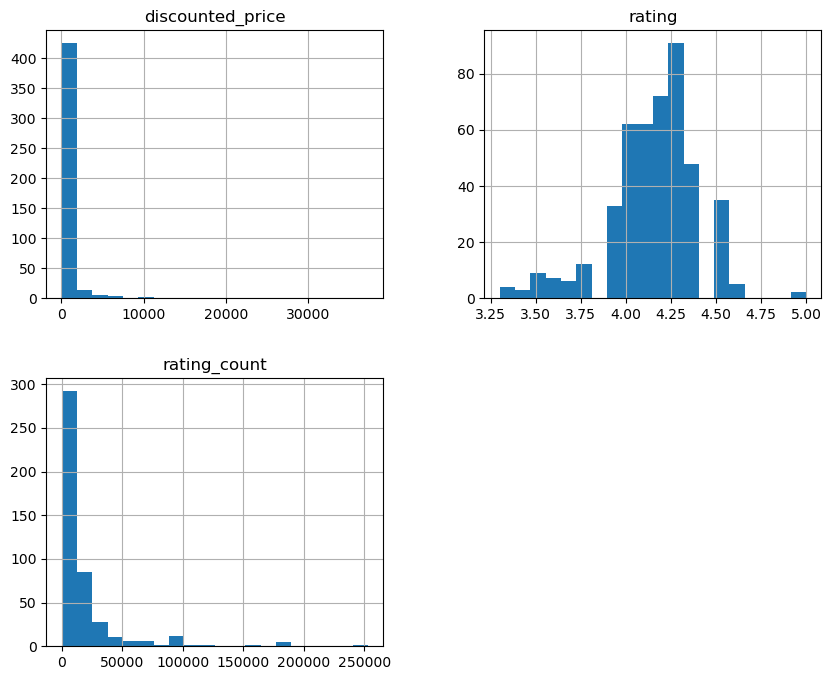

In [42]:
computers_accessories[['discounted_price', 'rating', 'rating_count']].hist(bins = 20, figsize = (10, 8))

In [19]:
# Fazendo a matriz de correlação linear segmentada por categoria de Eletrônicos
electronics[['discounted_price', 'actual_price', 'rating', 'rating_count']].corr()

,discounted_price,actual_price,rating,rating_count
discounted_price,1.000000,0.963839,0.212982,-0.104925
actual_price,0.963839,1.000000,0.212889,-0.123015
rating,0.212982,0.212889,1.000000,0.122618
rating_count,-0.104925,-0.123015,0.122618,1.000000


array([[<Axes: title={'center': 'discounted_price'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'rating_count'}>, <Axes: >]], dtype=object)

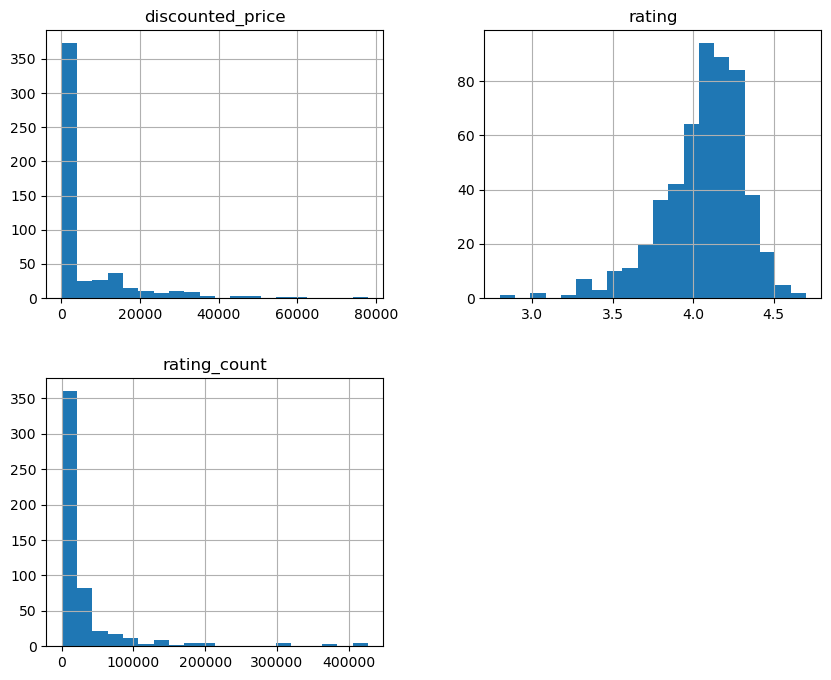

In [37]:
electronics[['discounted_price', 'rating', 'rating_count']].hist(bins = 20, figsize = (10, 8))

In [20]:
# Fazendo a matriz de correlação linear segmentada por categoria de Itens Domésticos
home[['discounted_price', 'actual_price', 'rating', 'rating_count']].corr()

,discounted_price,actual_price,rating,rating_count
discounted_price,1.000000,0.934170,0.202371,-0.027408
actual_price,0.934170,1.000000,0.192360,-0.039668
rating,0.202371,0.192360,1.000000,0.062597
rating_count,-0.027408,-0.039668,0.062597,1.000000


array([[<Axes: title={'center': 'discounted_price'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'rating_count'}>, <Axes: >]], dtype=object)

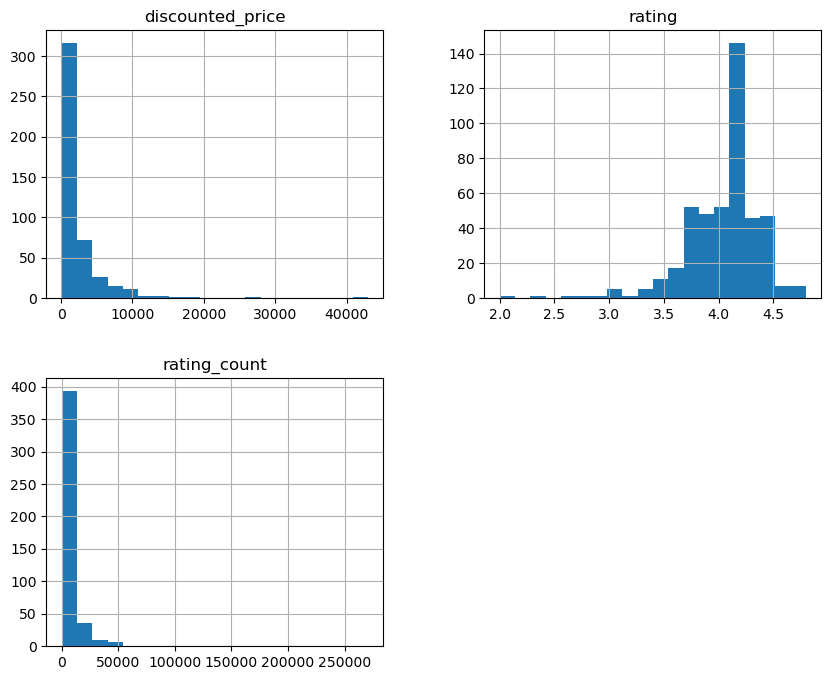

In [39]:
home[['discounted_price', 'rating', 'rating_count']].hist(bins = 20, figsize = (10, 8))

In [21]:
# Fazendo a matriz de correlação linear segmentada por categoria de Itens de Escritório
office[['discounted_price', 'actual_price', 'rating', 'rating_count']].corr()

,discounted_price,actual_price,rating,rating_count
discounted_price,1.000000,0.900600,0.206934,0.023848
actual_price,0.900600,1.000000,0.070703,0.028086
rating,0.206934,0.070703,1.000000,0.205024
rating_count,0.023848,0.028086,0.205024,1.000000


array([[<Axes: title={'center': 'discounted_price'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'rating_count'}>, <Axes: >]], dtype=object)

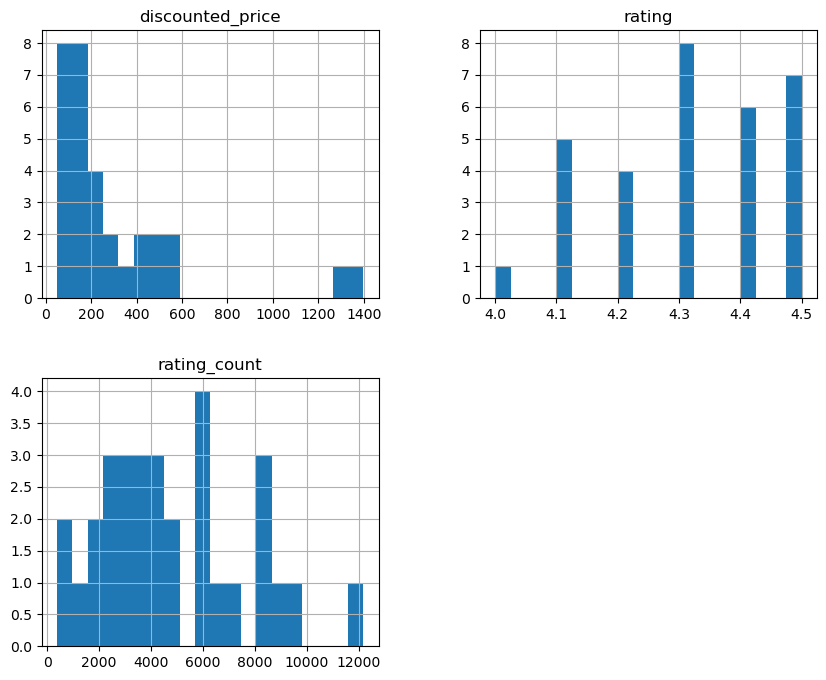

In [41]:
office[['discounted_price', 'rating', 'rating_count']].hist(bins = 20, figsize = (10, 8))